# Introduction
- **Nonogram Solver** - Started sometime in 2014.
- The goal of this project is to  build an algorithm that solves nonogram puzzles. 
- Relevant links:
    - What is a Nonogram? - [Wikipedia](https://en.wikipedia.org/wiki/Nonogram)
    - Source of puzzles - [onlinenonograms.com](https://onlinenonograms.com)
<br><br><a id="contents"></a>
- #### Table of contents:
    1. [Imports](#20200920123112)
    1. [Lib demo](#20200920123334)
    1. [Nonogram Solver](#20200920123426)


<a id="20200920123112"></a>
# Imports
<!-- 1. [Imports](#20200920123112) -->
[Table of contents](#contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.notebook import tqdm
import time
import ast

In [2]:
from nonogram import propagate_nonogram_vector, propagate_board, find_nonogram_options_matrix

<a id="20200920123334"></a>
# Lib demo
<!-- 1. [Lib demo](#20200920123334) -->
[Table of contents](#contents)

In [3]:
# propagate_nonogram_vector(-np.ones((1, 5)), [1, 3])
# print(all_possible_vectors(10, 3, fast=False))
# print(all_possible_vectors(10, 3, fast=True))

<a id="20200920123426"></a>
# Nonogram Solver
<!-- 1. [Nonogram Solver](#20200920123426) -->
[Table of contents](#contents)

In [4]:
puzzle_df = pd.read_csv('./puzzle_full_data.csv').dropna()

In [5]:
puzzle_df['size'].value_counts(normalize=True).mul(100).round(2).head(3)

20x20    2.40
35x45    2.19
45x45    1.89
Name: size, dtype: float64

In [15]:
random_puzzle = puzzle_df.loc[(puzzle_df['size'] == '20x20') & (puzzle_df['rating'] >= 4)].sample(1).iloc[0]
random_puzzle = puzzle_df.loc[puzzle_df['puzzle_id'] == 5965].iloc[0]
board_rows, board_cols = random_puzzle[['row_data', 'col_data']].apply(ast.literal_eval)
row_num, col_num = len(board_rows), len(board_cols)

assert np.sum(np.sum(board_rows)) == np.sum(np.sum(board_cols)), print(np.sum(np.sum(board_rows)), np.sum(np.sum(board_cols)))
assert len(board_rows) == len(board_rows)

especially difficult puzzles were:
* 9520 was so big it didn't finish all night and kernel restarted. Would have to make improvements to solve such big (over 50 rows) puzzles in reasonable time.

especially cute puzzles were:
* Miny mouse, 5965
* Cat 2204
* Camera 2685

Solving puzzle 5965 which is 40x30
Phase 1/3



Phase 2/3



Considering around 1E255 board configurations
Phase 3/3
Iteration 0	 - 100.0% of board left
Iteration 1	 - 93.0% of board left
Iteration 2	 - 86.25% of board left
Iteration 3	 - 73.5% of board left
Iteration 4	 - 56.17% of board left
Iteration 5	 - 48.83% of board left
Iteration 6	 - 43.75% of board left
Iteration 7	 - 40.42% of board left
Iteration 8	 - 38.25% of board left
Iteration 9	 - 35.17% of board left
Iteration 10	 - 33.67% of board left
Iteration 11	 - 32.75% of board left
Iteration 12	 - 30.08% of board left
Iteration 13	 - 28.08% of board left
Iteration 14	 - 26.17% of board left
Iteration 15	 - 23.0% of board left
Iteration 16	 - 20.75% of board left
Iteration 17	 - 19.67% of board left
Iteration 18	 - 19.0% of board left
Iteration 19	 - 18.58% of board left
Iteration 20	 - 18.25% of board left
Iteration 21	 - 17.92% of board left
Iteration 22	 - 17.33% of board left
Iteration 23	 - 16.58% of board left
Iteration 24	 - 12.25% of board left
Iteration 25	 - 9.167% of board 

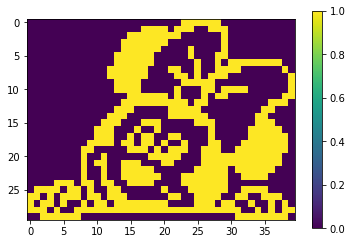

Took 43 seconds


In [17]:
started = int(time.time())
options_dict_r = {}
options_dict_c = {}
print(f"Solving puzzle {random_puzzle['puzzle_id']} which is {random_puzzle['size']}")
print('Phase 1/3')
for i in tqdm(range(row_num)):
    options_dict_r[i] = find_nonogram_options_matrix(col_num, board_rows[i])
print('Phase 2/3')
for i in tqdm(range(col_num)):
    options_dict_c[i] = find_nonogram_options_matrix(row_num, board_cols[i])

print(f'Considering around 1E',
      int(np.round(np.sum(np.log10([option.shape[0] for _, option in options_dict_r.items()])) + np.sum(np.log10([option.shape[0] for _, option in options_dict_c.items()])))), 
      ' board configurations', 
      sep='')

print('Phase 3/3')
board_mat = -np.ones(shape=(row_num, col_num))
board_mat, _, options_dict_r, options_dict_c = propagate_board(board_mat, options_dict_r, options_dict_c, verbose=True)

# print(np.sum((board_mat == -1)))

# board_mat
if board_mat is not None:
    plt.imshow(board_mat)
    plt.colorbar()
    plt.show()
    
print(f'Took {int(time.time()) - started} seconds')

In [8]:
# vector_matrix_congruence(board_mat[0, :], options_dict_r[0])
# vector_matrix_congruence(board_mat[2, :], options_dict_r[2])

In [9]:
# print([option.shape[0] for _, option in options_dict_r.items()])
# print([option.shape[0] for _, option in options_dict_c.items()])

**Ideas for improvement:**
- Most of the run time is for creating the options dictionary. It might be possible to estimate the number of options per row/column and skip the difficult ones. The difficults ones are not likely to produce any value anyway. Then we can solve the difficult ones later on, but we'd have to develop an algorithm for finding the optional vectors with some existing knowledge. 
- It is actually very possilbe since find_vecs_that_sum is so fast and what takes long is the permutations. Once we know the first or last space the number of space vectors is greately reduced and so is the number of permutations.